My assignmnet is to build a model using Linear and Polynomial Regression. I will be building my model on the California Housing Dataset provided by Scikit-Learn.

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing()

california_housing_df = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
california_housing_df['HousePrice'] = california_housing.target

X = california_housing_df
y = california_housing_df['HousePrice']

X.head()

# print(california_housing.feature_names)
# print(california_housing.DESCR)



,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,HousePrice
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [72]:
# print(california_housing_df['HouseAge'].corr(california_housing_df['Latitude']))
# print(california_housing_df['HouseAge'].corr(california_housing_df['Longitude']))

correlation_matrix = california_housing_df[['HouseAge', 'Latitude', 'Longitude']].corr()

print(correlation_matrix)

           HouseAge  Latitude  Longitude
HouseAge   1.000000  0.011173  -0.108197
Latitude   0.011173  1.000000  -0.924664
Longitude -0.108197 -0.924664   1.000000


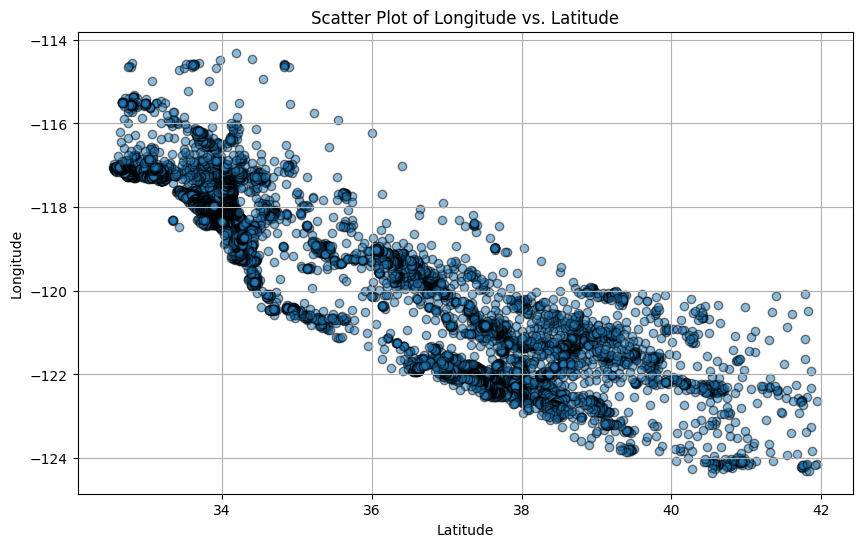

In [73]:
plt.figure(figsize=(10, 6))
plt.scatter(california_housing_df['Latitude'], california_housing_df['Longitude'], alpha=0.5, edgecolors='k')
plt.title('Scatter Plot of Longitude vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.grid(True)
plt.show()

I was wondering why the Latitude and Longitude had such a big correlation, but really it is just making the shape of California. However, here I can see what neighborhoods are dense and what are not.

0.1056234124932099


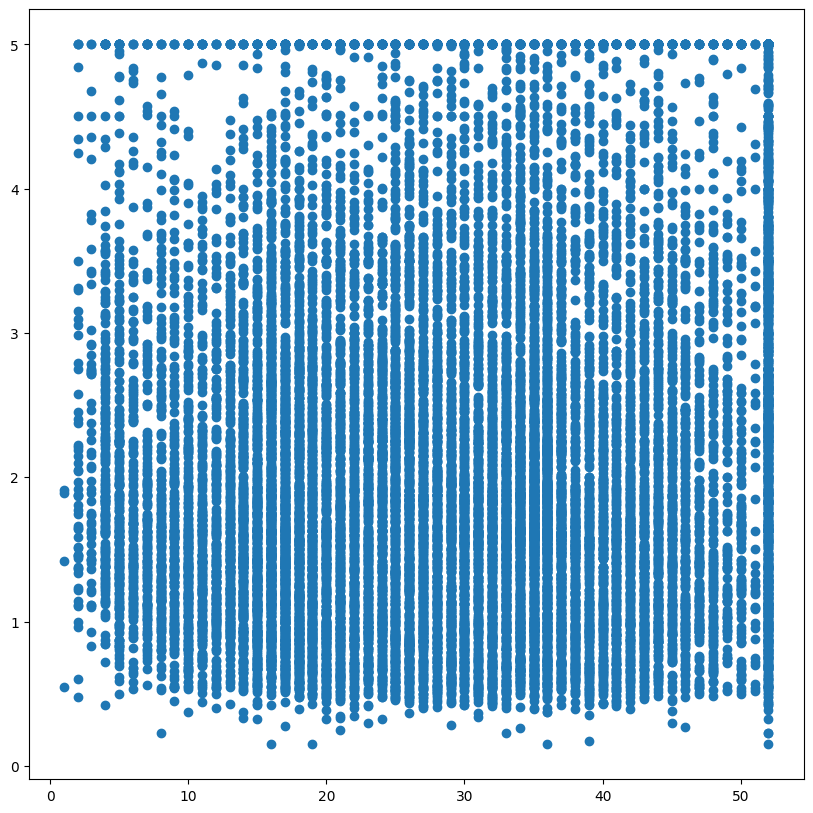

In [85]:
print(california_housing_df['HouseAge'].corr(california_housing_df['HousePrice']))

plt.figure(figsize=(10, 10))
plt.scatter(california_housing_df['HouseAge'], california_housing_df['HousePrice'])


I do not see much correlation with HouseAge and HousePrice.

In [88]:
X = california_housing_df[['HouseAge', 'Latitude', 'Longitude']]
y = california_housing_df['HousePrice']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)


print(f'Mean error: {mse:3.3} ({mse/np.mean(y_pred)*100:3.3}%)')


Mean error: 0.979 (47.4%)
